**Seeding for reproducibility**

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Preprocessing**

In [3]:
# Dataset Path
base_dir = r"D:\internship\My project - Crop disease Detection with rag\Plant_leaf_diseases_dataset_without_augmentation\Plant_leave_diseases_dataset_without_augmentation"

(256, 256, 3)


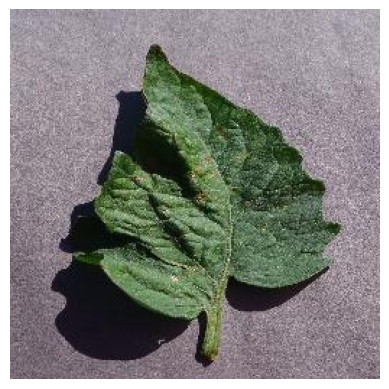

In [4]:
image_path = r"D:\internship\My project - Crop disease Detection with rag\Plant_leaf_diseases_dataset_without_augmentation\Plant_leave_diseases_dataset_without_augmentation\Tomato___Target_Spot\image (3).JPG"

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [5]:

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[155 149 161]
  [167 161 173]
  [164 158 170]
  ...
  [176 171 178]
  [167 162 169]
  [178 173 180]]

 [[161 155 167]
  [160 154 166]
  [159 153 165]
  ...
  [174 169 176]
  [167 162 169]
  [176 171 178]]

 [[160 154 166]
  [160 154 166]
  [159 153 165]
  ...
  [182 177 184]
  [166 161 168]
  [162 157 164]]

 ...

 [[108  95 105]
  [132 119 129]
  [105  92 102]
  ...
  [148 135 145]
  [135 122 132]
  [164 151 161]]

 [[123 110 120]
  [119 106 116]
  [137 124 134]
  ...
  [130 117 127]
  [123 110 120]
  [ 84  71  81]]

 [[126 113 123]
  [146 133 143]
  [111  98 108]
  ...
  [119 106 116]
  [125 112 122]
  [143 130 140]]]


In [6]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [7]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [8]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 44371 images belonging to 39 classes.


In [9]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 11077 images belonging to 39 classes.


**Convolutional Neural Network**

In [10]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [11]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [12]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [14]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=50,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/50


1386/1386 [==============================] - 1670s 1s/step - loss: 0.9693 - accuracy: 0.7361 - val_loss: 0.4939 - val_accuracy: 0.8500
Epoch 2/50
1386/1386 [==============================] - 1406s 1s/step - loss: 0.2805 - accuracy: 0.9097 - val_loss: 0.4105 - val_accuracy: 0.8770
Epoch 3/50
1386/1386 [==============================] - 1268s 915ms/step - loss: 0.1335 - accuracy: 0.9568 - val_loss: 0.5171 - val_accuracy: 0.8674
Epoch 4/50
1386/1386 [==============================] - 1382s 997ms/step - loss: 0.0867 - accuracy: 0.9718 - val_loss: 0.5472 - val_accuracy: 0.8665
Epoch 5/50
1386/1386 [==============================] - 1233s 889ms/step - loss: 0.0668 - accuracy: 0.9785 - val_loss: 0.5319 - val_accuracy: 0.8858
Epoch 6/50
1386/1386 [==============================] - 1025s 739ms/step - loss: 0.0539 - accuracy: 0.9827 - val_loss: 0.6670 - val_accuracy: 0.8665
Epoch 7/50
1386/1386 [==============================] - 998s 720ms/step - loss: 0.0500 - accuracy: 0.9839 - va

KeyboardInterrupt: 

**Model Evaluation**

In [14]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
346/346 [==============================] - 63s 181ms/step - loss: 3.6458 - accuracy: 0.0072
Validation Accuracy: 0.72%


In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

**Building a Predictive System**

In [16]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [17]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [18]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Background_without_leaves',
 5: 'Blueberry___healthy',
 6: 'Cherry___Powdery_mildew',
 7: 'Cherry___healthy',
 8: 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 9: 'Corn___Common_rust',
 10: 'Corn___Northern_Leaf_Blight',
 11: 'Corn___healthy',
 12: 'Grape___Black_rot',
 13: 'Grape___Esca_(Black_Measles)',
 14: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 15: 'Grape___healthy',
 16: 'Orange___Haunglongbing_(Citrus_greening)',
 17: 'Peach___Bacterial_spot',
 18: 'Peach___healthy',
 19: 'Pepper,_bell___Bacterial_spot',
 20: 'Pepper,_bell___healthy',
 21: 'Potato___Early_blight',
 22: 'Potato___Late_blight',
 23: 'Potato___healthy',
 24: 'Raspberry___healthy',
 25: 'Soybean___healthy',
 26: 'Squash___Powdery_mildew',
 27: 'Strawberry___Leaf_scorch',
 28: 'Strawberry___healthy',
 29: 'Tomato___Bacterial_spot',
 30: 'Tomato___Early_blight',
 31: 'Tomato___Late_blight',
 32: 'Toma

In [19]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [20]:
# Example Usage
image_path = '/content/test_apple_black_rot.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\content\\test_apple_black_rot.JPG'

**Save the model to Google drive or local**

In [21]:
model.save('myproject_plant_disease_prediction_model.h5')